Deep Learning Project_Original


DATA_cnt = 300

In [1]:
import tensorflow as tf
import numpy as np


print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image
import glob
import os 

print("PIL Library import completed")

PIL Library import completed


In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), "images resized.")
    
image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/rock" 
resize_images(image_dir_path)


print("Rock Image Resized completed ")

350 images to be resized
350 images resized.
Rock Image Resized completed 


In [4]:
image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/scissor" 
resize_images(image_dir_path)


print("Scissor Image Resized completed ")

350 images to be resized
350 images resized.
Scissor Image Resized completed 


In [5]:
image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/paper" 
resize_images(image_dir_path)


print("Paper Image Resized completed ")

350 images to be resized
350 images resized.
Paper Image Resized completed 


In [6]:
def load_data(img_path, number_of_data = 1050):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    
        
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1       
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1               
    
         
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1               
    
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper"
(x_train, y_train)= load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape;{}". format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1050 입니다.
x_train shape;(1050, 28, 28, 3)
y_train shape:(1050,)


라벨: 0


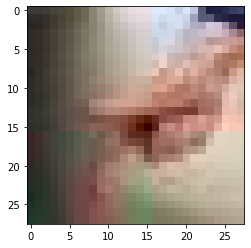

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨:',  y_train[0])

Deep Learning Network Design

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# hyperparameter setting 

n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

# modeling

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28, 28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

Model Fitting

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
33/33 [==============================] - 1s 23ms/step - loss: 8.5550 - accuracy: 0.4314
Epoch 2/10
33/33 [==============================] - 1s 22ms/step - loss: 0.8353 - accuracy: 0.7210
Epoch 3/10
33/33 [==============================] - 1s 23ms/step - loss: 0.4173 - accuracy: 0.8486
Epoch 4/10
33/33 [==============================] - 1s 22ms/step - loss: 0.3129 - accuracy: 0.8943
Epoch 5/10
33/33 [==============================] - 1s 22ms/step - loss: 0.1681 - accuracy: 0.9562
Epoch 6/10
33/33 [==============================] - 1s 23ms/step - loss: 0.0923 - accuracy: 0.9743
Epoch 7/10
33/33 [==============================] - 1s 22ms/step - loss: 0.0515 - accuracy: 0.9876
Epoch 8/10
33/33 [==============================] - 1s 22ms/step - loss: 0.0262 - accuracy: 0.9962
Epoch 9/10
33/33 [==============================] - 1s 23ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 10/10
33/33 [==============================] - 1s 22ms/step - loss: 0.0078 - accuracy: 1.0000


Model Testing

In [10]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), "images resized.")
    
image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/test/rock" 
resize_images(image_dir_path)


print("Rock Image Resized completed ")

150 images to be resized
150 images resized.
Rock Image Resized completed 


In [11]:
    
image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/test/scissor" 
resize_images(image_dir_path)


print("Rock Image Resized completed ")

150 images to be resized
150 images resized.
Rock Image Resized completed 


In [12]:

image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/test/paper" 
resize_images(image_dir_path)


print("Rock Image Resized completed ")

150 images to be resized
150 images resized.
Rock Image Resized completed 


In [13]:
def load_data(img_path, number_of_data = 450):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    
        
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1       
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1               
    
         
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1               
    
    print("테스트데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels


In [14]:

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_nor = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape:{}".format(y_test.shape)) 

테스트데이터(x_test)의 이미지 개수는 450 입니다.
x_test shape: (450, 28, 28, 3)
y_test shape:(450,)


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy:{}".format(test_accuracy))

15/15 - 0s - loss: 0.5660 - accuracy: 0.8600
test_loss: 0.5659591555595398
test_accuracy:0.8600000143051147
